# Generate inputs data (clusters)

In [2]:
# imports needed
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import scipy.io
from skimage import io
from sklearn.datasets import make_blobs
import pandas as pd

# k = 3, N = 10000000, Generate Input

In [152]:
N_SAMPLES = 1000000
RANDOM_STATE = 42

In [153]:
# Generate some training data from clustering
X, y = make_blobs(n_samples=N_SAMPLES,
                  cluster_std=[0.5, 0.5, 0.5],#, 0.5, 0.5],
                  centers=[(-10, -10), (0, 7), (15, -10)],#, (-10, 10), (-10, 20)],
                  random_state=RANDOM_STATE)

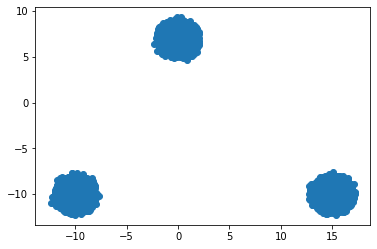

In [154]:
plt.scatter(X[:, 0], X[:, 1])

In [155]:
output = pd.DataFrame(X)

In [156]:
output.to_csv("input.csv", index = False, header = False)

# Load the result from simple C++ Program and Visualize (k == 3)

In [190]:
result = pd.read_csv("result.csv")

In [191]:
x0 = np.asarray(result[result.labels == 0])
x1 = np.asarray(result[result.labels == 1])
x2 = np.asarray(result[result.labels == 2])
# x3 = np.asarray(result[result.labels == 3])
# x4 = np.asarray(result[result.labels == 4])

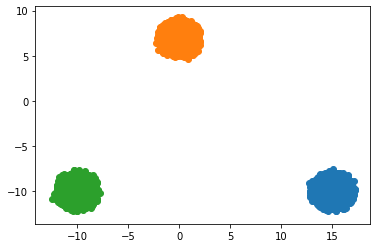

In [192]:
plt.scatter(x0[:, 0], x0[:, 1])
plt.scatter(x1[:, 0], x1[:, 1])
plt.scatter(x2[:, 0], x2[:, 1])
# plt.scatter(x3[:, 0], x3[:, 1])
# plt.scatter(x4[:, 0], x4[:, 1])
plt.show()

# Load the result from CUDA implementation and Visualize (k == 3)

In [220]:
result_cuda = pd.read_csv("result_cuda.csv")

In [221]:
xc0 = np.asarray(result_cuda[result_cuda.labels == 0])
xc1 = np.asarray(result_cuda[result_cuda.labels == 1])
xc2 = np.asarray(result_cuda[result_cuda.labels == 2])

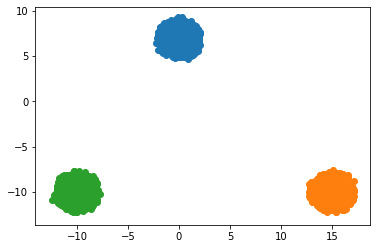

In [222]:
plt.scatter(xc0[:, 0], xc0[:, 1])
plt.scatter(xc1[:, 0], xc1[:, 1])
plt.scatter(xc2[:, 0], xc2[:, 1])
plt.show()

# k = 5, N = 1000000, Generate Input

In [247]:
N_SAMPLES = 1000000
RANDOM_STATE = 42

In [248]:
# Generate some training data from clustering
X, y = make_blobs(n_samples=N_SAMPLES,
                  cluster_std=[0.5, 0.5, 0.5, 0.5, 0.5],# 0.5, 0.5],
                  centers=[(-5, 7), (7, -1), (3, 11), (7, 15), (-1, 3)], # (-10, -30), (30, 30)],
                  random_state=RANDOM_STATE)

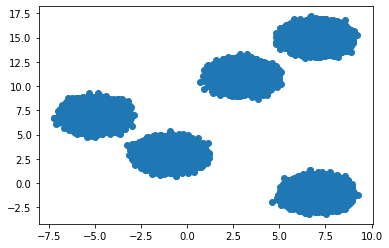

In [249]:
plt.scatter(X[:, 0], X[:, 1])

In [250]:
output = pd.DataFrame(X)

In [251]:
output.to_csv("input.csv", index = False, header = False)

# Load the result from simple C++ Program and Visualize (k == 5)

In [258]:
result = pd.read_csv("result.csv")

In [259]:
x0 = np.asarray(result[result.labels == 0])
x1 = np.asarray(result[result.labels == 1])
x2 = np.asarray(result[result.labels == 2])
x3 = np.asarray(result[result.labels == 3])
x4 = np.asarray(result[result.labels == 4])

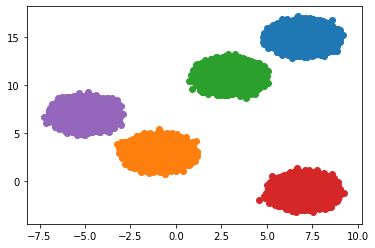

In [260]:
plt.scatter(x0[:, 0], x0[:, 1])
plt.scatter(x1[:, 0], x1[:, 1])
plt.scatter(x2[:, 0], x2[:, 1])
plt.scatter(x3[:, 0], x3[:, 1])
plt.scatter(x4[:, 0], x4[:, 1])
plt.show()

# Load the result from CUDA Program and Visualize (k == 5)

In [261]:
result_cuda = pd.read_csv("result_cuda.csv")

In [277]:
xc0 = np.asarray(result_cuda[result_cuda.labels == 0])
xc1 = np.asarray(result_cuda[result_cuda.labels == 1])
xc2 = np.asarray(result_cuda[result_cuda.labels == 2])
xc3 = np.asarray(result_cuda[result_cuda.labels == 3])
xc4 = np.asarray(result_cuda[result_cuda.labels == 4])

xc = []
for i in range(100):
    tmp = np.asarray(result_cuda[result_cuda.labels ==i])
    xc.append(tmp)

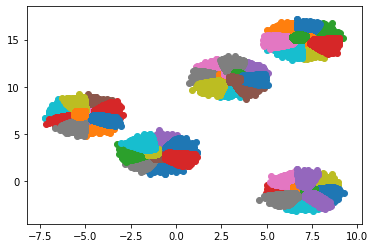

In [278]:
# plt.scatter(xc0[:, 0], xc0[:, 1])
# plt.scatter(xc1[:, 0], xc1[:, 1])
# plt.scatter(xc2[:, 0], xc2[:, 1])
# plt.scatter(xc3[:, 0], xc3[:, 1])
# plt.scatter(xc4[:, 0], xc4[:, 1])
for i in range(100):
    plt.scatter(xc[i][:, 0], xc[i][:, 1])
plt.show()

# Plotting Results

In [22]:
cpp_time = [0, 0, 11, 54, 552, 7336, 49825]
cuda_time = [86, 97, 102, 83, 112, 337, 2499]
t_axis = [10, 100, 1000, 10000, 100000, 1000000, 10000000]

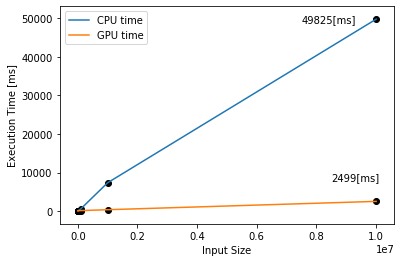

In [23]:
plt.plot(t_axis, cpp_time, label="CPU time")
plt.plot(t_axis, cuda_time, label="GPU time")
plt.scatter(t_axis, cpp_time, color='black')
plt.scatter(t_axis, cuda_time, color='black')
plt.text(0.85e+7, 8000, "2499[ms]")
plt.text(0.75e7, 49000, "49825[ms]")
plt.xlabel("Input Size")
plt.ylabel("Execution Time [ms]")
plt.legend()

In [ ]:
def generateTestFile(filename="input.txt", k=3, )